In [1]:
filepath = "../AWS_Textract/Inputs/AccordXRT2.pdf"

In [31]:
from pdf2image import convert_from_path
import pytesseract

pages = convert_from_path(filepath, first_page=4, last_page=4)

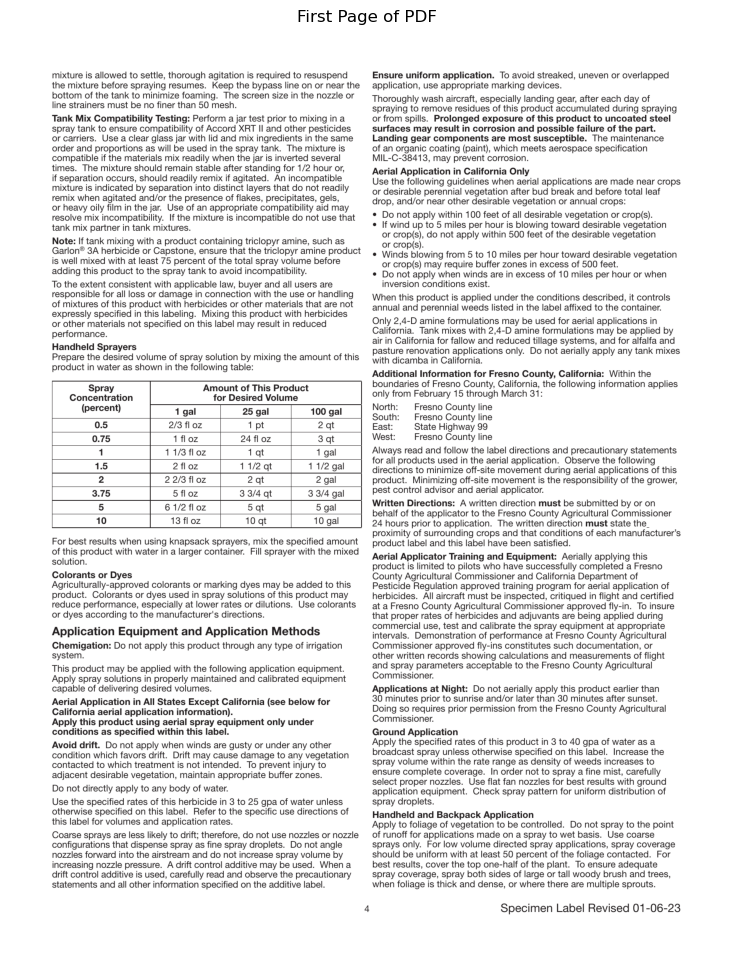

In [33]:
import matplotlib.pyplot as plt

first_page_image = pages[0]


plt.figure(figsize=(10, 12))
plt.imshow(first_page_image, cmap='gray')
plt.axis('off') 
plt.title("First Page of PDF")
plt.show()

In [35]:
if pages:
    first_page_image = pages[0]
    text = pytesseract.image_to_string(first_page_image, config="--psm 1")
    print("Extracted Text:\n", text)
else:
    print("No pages were found in the PDF.")


Extracted Text:
 mixture is allowed to settle, thorough agitation is required to resuspend
the mixture before spraying resumes. Keep the bypass line on or near the
bottom of the tank to minimize foaming. The screen size in the nozzle or
line strainers must be no finer than 50 mesh.

Tank Mix Compatibility Testing: Perform a jar test prior to mixing ina
spray tank to ensure compatibility of Accord XRT II and other pesticides
or carriers. Use a clear glass jar with lid and mix ingredients in the same
order and proportions as will be used in the spray tank. The mixture is
compatible if the materials mix readily when the jar is inverted several
times. The mixture should remain stable after standing for 1/2 hour or,

if separation occurs, should readily remix if agitated. An incompatible
mixture is indicated by separation into distinct layers that do not readily
remix when agitated and/or the presence of flakes, precipitates, gels,

or heavy oily film in the jar. Use of an appropriate compa

In [41]:
import pytesseract
import layoutparser as lp
from PIL import Image

# Load the first page image
if pages:
    first_page_image = pages[0]
    image = first_page_image.convert("RGB")  # Ensure image is in RGB format

    # Initialize the layout detection model (using PubLayNet for table detection)
    model = lp.Detectron2LayoutModel(
        'lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config',
        extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.5],
        label_map={'Text': 0, 'Title': 1, 'List': 2, 'Table': 3, 'Figure': 4}
    )

    # Detect layout elements
    layout = model.detect(image)

    # Sort layout elements top to bottom
    layout = lp.Layout(sorted(layout, key=lambda x: (x.coordinates[1], x.coordinates[0])))

    extracted_content = ""

    for block in layout:
        block_image = block.crop_image(image)

        if block.type == 'Table':
            # For tables, use a suitable PSM mode, e.g., 6 (Assume a single uniform block of text)
            table_text = pytesseract.image_to_string(block_image, config="--psm 6")
            extracted_content += "\n\n[Table]\n" + table_text + "\n"
        else:
            # For regular text, use PSM 3 (Default)
            text = pytesseract.image_to_string(block_image, config="--psm 3")
            extracted_content += text + "\n"

    print("Extracted Content:\n", extracted_content)
else:
    print("No pages were found in the PDF.")


AssertionError: Checkpoint /Users/sujayvatti/.torch/iopath_cache/s/dgy9c10wykk4lq4/model_final.pth not found!